In [30]:
from utils import sort_csv_for_channel, make_datasets, get_data_from_csv
from analysis_functions import g2, gaussian
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import numpy as np


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
channels_files_sorted=sort_csv_for_channel(r"HBT_data")

In [32]:
dataset_dict=make_datasets(channels_files_sorted)

HBT_data\-15_Ch1.csv
HBT_data\-14_Ch1.csv
HBT_data\-13_Ch1.csv
HBT_data\-12_Ch1.csv
HBT_data\-11_Ch1.csv
HBT_data\-10_Ch1.csv
HBT_data\-9_Ch1.csv
HBT_data\-8_Ch1.csv
HBT_data\-7_Ch1.csv
HBT_data\-6_Ch1.csv
HBT_data\-5_Ch1.csv
HBT_data\-4_Ch1.csv
HBT_data\-3_Ch1.csv
HBT_data\-2_Ch1.csv
HBT_data\-1_Ch1.csv
HBT_data\0_Ch1.csv
HBT_data\+1_Ch1.csv
HBT_data\+2_Ch1.csv
HBT_data\+3_Ch1.csv
HBT_data\+4_Ch1.csv
HBT_data\+5_Ch1.csv
HBT_data\+6_Ch1.csv
HBT_data\+7_Ch1.csv
HBT_data\+8_Ch1.csv
HBT_data\+9_Ch1.csv
HBT_data\+10_Ch1.csv
HBT_data\+11_Ch1.csv
HBT_data\+12_Ch1.csv
HBT_data\+13_Ch1.csv
HBT_data\+14_Ch1.csv
HBT_data\+15_Ch1.csv
HBT_data\-15_Ch2.csv
HBT_data\-14_Ch2.csv
HBT_data\-13_Ch2.csv
HBT_data\-12_Ch2.csv
HBT_data\-11_Ch2.csv
HBT_data\-10_Ch2.csv
HBT_data\-9_Ch2.csv
HBT_data\-8_Ch2.csv
HBT_data\-7_Ch2.csv
HBT_data\-6_Ch2.csv
HBT_data\-5_Ch2.csv
HBT_data\-4_Ch2.csv
HBT_data\-3_Ch2.csv
HBT_data\-2_Ch2.csv
HBT_data\-1_Ch2.csv
HBT_data\0_Ch2.csv
HBT_data\+1_Ch2.csv
HBT_data\+2_Ch2.csv
HBT_

In [52]:
dataset_dict['Ch1'].loc[0]

0        0.168
1        0.248
2        0.464
3        0.280
4        0.296
         ...  
49995    0.136
49996    0.112
49997    0.112
49998    0.104
49999    0.128
Name: 0, Length: 50000, dtype: float64

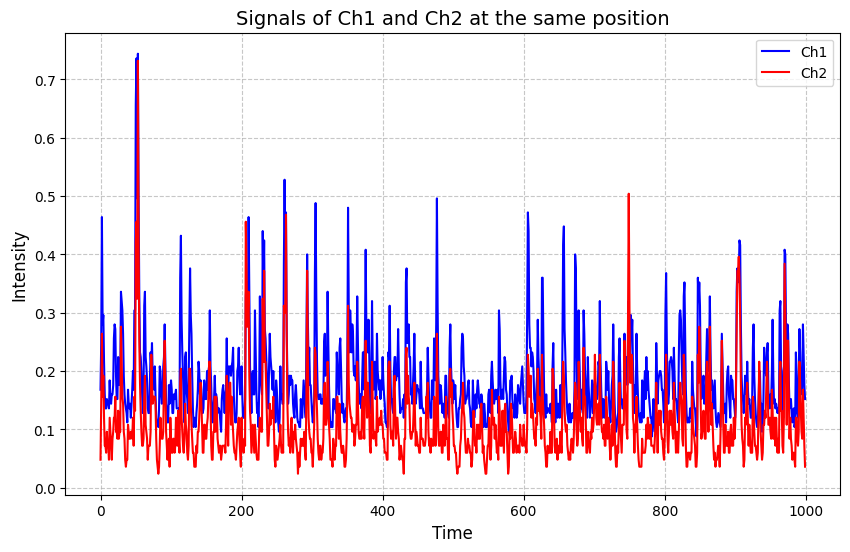

In [55]:
plt.figure(figsize=(10, 6))
time_points = np.linspace(0, len(dataset_dict['Ch1'].loc[0].values[:1000]) - 1, 1000)
plt.plot(time_points, dataset_dict['Ch1'].loc[0].values[:1000], label='Ch1', color='blue')
plt.plot(time_points, dataset_dict['Ch2'].loc[0].values[:1000], label='Ch2', color='red')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.title('Signals of Ch1 and Ch2 at the same position', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

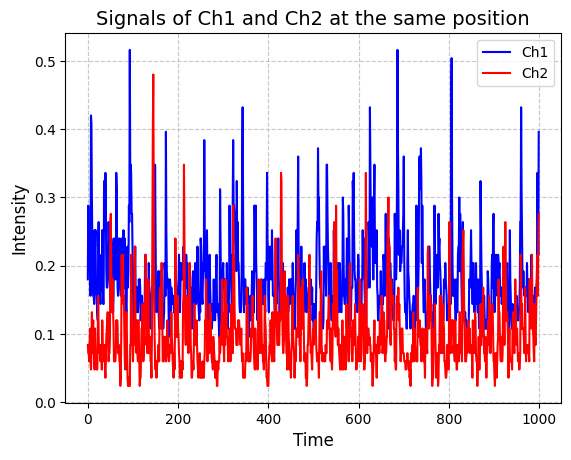

In [56]:
time_points = np.linspace(0, len(dataset_dict['Ch1'].loc[0].values[:1000]) - 1, 1000)
plt.plot(time_points, dataset_dict['Ch1'].loc[-15].values[:1000], label='Ch1', color='blue')
plt.plot(time_points, dataset_dict['Ch2'].loc[15].values[:1000], label='Ch2', color='red')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.title('Signals of Ch1 and Ch2 at the same position', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
time_points = np.linspace(0, len(dataset_dict['Ch1'].loc[-2]) - 1, 1000)
plt.plot(time_points, dataset_dict['Ch1'].loc[0].values[:1000], label='Ch1', color='blue')
plt.plot(time_points, dataset_dict['Ch2'].loc[0].values[:1000], label='Ch2', color='red')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.title('Signals of Ch1 and Ch2 at the same position', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [34]:
#compute g2
g2 = g2(dataset_dict, normalize=True) 


In [37]:
# real range
a = -7.5  # mm
b = 7.5   # mm

# rescaling
g2.index = np.linspace(a, b, 31)

In [38]:
g2.index

Index([-7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0,
       -1.5, -1.0, -0.5,  0.0,  0.5,  1.0,  1.5,  2.0,  2.5,  3.0,  3.5,  4.0,
        4.5,  5.0,  5.5,  6.0,  6.5,  7.0,  7.5],
      dtype='float64')

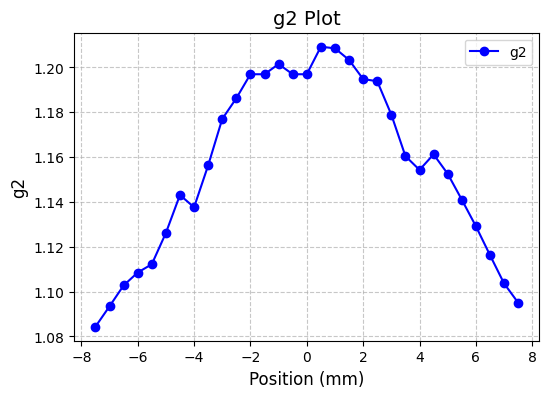

In [39]:
plt.figure(figsize=(6, 4))
plt.plot(g2.index,g2.values, label='g2', color='blue', linestyle='-', marker='o')
plt.xlabel('Position (mm)', fontsize=12)
plt.ylabel('g2', fontsize=12)
plt.title('g2 Plot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [40]:
#gaussian fit
parameters, covariance = curve_fit(gaussian, g2.index, g2.values) 

In [41]:
parameters
errors = np.sqrt(np.diag(covariance))
print("Errori standard dei parametri:")
print(errors)

Errori standard dei parametri:
[0.00201718 0.07052585 0.10037202]


<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\annid\AppData\Local\Temp\ipykernel_17028\3396085524.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$mm\n$\sigma={fit_sigma:.2f}$mm\nFWHM={fwhm:.2f}mm', transform=plt.gca().transAxes,
C:\Users\annid\AppData\Local\Temp\ipykernel_17028\3396085524.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$mm\n$\sigma={fit_sigma:.2f}$mm\nFWHM={fwhm:.2f}mm', transform=plt.gca().transAxes,


Text(0.05, 0.95, '$\\mu=0.37$mm\n$\\sigma=5.72$mm\nFWHM=13.47mm')

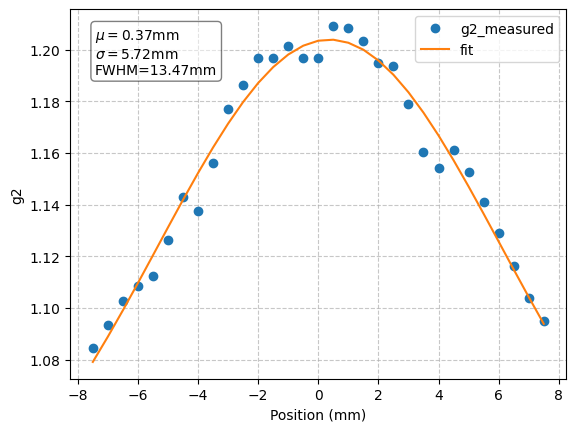

In [42]:
fit_A = parameters[0] 
fit_mu = parameters[1] 
fit_sigma = parameters[2]
x = g2.index
fwhm = 2 * np.sqrt(2 * np.log(2)) * fit_sigma


fit_g2 = gaussian(x, fit_A, fit_mu, fit_sigma) 
plt.plot(x, g2, 'o', label='g2_measured') 
plt.plot(x, fit_g2, '-', label='fit') 
# x_domain = np.linspace(-7,7,140)
# plt.plot(x_domain, gaussian(x_domain, fit_A, fit_mu, fit_sigma), '--', label='fit_large_domain')
plt.xlabel('Position (mm)')
plt.ylabel('g2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$mm\n$\sigma={fit_sigma:.2f}$mm\nFWHM={fwhm:.2f}mm', transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\annid\AppData\Local\Temp\ipykernel_17028\3177831146.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$mm\n$\sigma={fit_sigma:.2f}$mm\nFWHM={fwhm:.2f}mm', transform=plt.gca().transAxes,
C:\Users\annid\AppData\Local\Temp\ipykernel_17028\3177831146.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$mm\n$\sigma={fit_sigma:.2f}$mm\nFWHM={fwhm:.2f}mm', transform=plt.gca().transAxes,


Text(0.05, 0.95, '$\\mu=0.37$mm\n$\\sigma=5.72$mm\nFWHM=13.47mm')

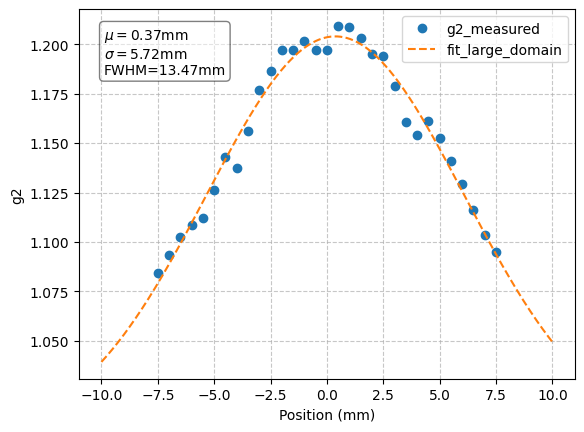

In [ ]:
plt.plot(x, g2, 'o', label='g2_measured') 
x_domain = np.linspace(-10,10,1000)
plt.plot(x_domain, gaussian(x_domain, fit_A, fit_mu, fit_sigma), '--', label='fit_large_domain')
plt.xlabel('Position (mm)')
plt.ylabel('g2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$mm\n$\sigma={fit_sigma:.2f}$mm\nFWHM={fwhm:.2f}mm', transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

In [43]:
d=400
lam= 0.000532
f=125
wo=3.5


sigma_sorg=d*lam/(np.sqrt(2)*fit_sigma*2*np.pi)
w=lam*f/(wo*np.pi)


In [45]:
print(sigma_sorg,
w)

0.004186734728452958 0.006047887837492024
